In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [2]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [3]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [4]:
X_train.shape

(50000, 32, 32, 3)

In [5]:
y_train.shape

(50000, 1)

In [6]:
def plot_sample(index):
    plt.figure(figsize = (10,1))
    plt.imshow(X_train[index])

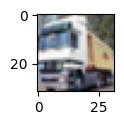

In [7]:
plot_sample(1)

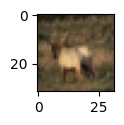

In [8]:
plot_sample(3)

In [9]:
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [10]:
y_train[3]

array([4], dtype=uint8)

In [11]:
classes[y_train[3][0]]

'deer'

##Scaling Images

In [12]:
X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [13]:
X_train_scaled.shape

(50000, 32, 32, 3)

##One Hot Encoding

In [14]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [15]:
y_train_categorical = keras.utils.to_categorical(
    y_train, num_classes = 10).astype('float32')
y_train_categorical[:5]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [16]:
y_test_categorical = keras.utils.to_categorical(
    y_test, num_classes = 10
).astype("float32")
y_test_categorical[:5]

array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]], dtype=float32)

##Model Building

In [17]:
32*32*3 
#hidden layer is good to have neurons somewhat equal to this

3072

In [18]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (32,32,3)),
    keras.layers.Dense(3000, activation ='relu'),
    keras.layers.Dense(1000, activation = 'relu'), #random hidden layer added. good to add new hidden layer for good results
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer = 'SGD',
              loss = 'categorical_crossentropy',#for one hot encoded output categorical values, use categorical cross entropy and not sparse categorical crossentropy
              metrics = ['accuracy']
)

model.fit(X_train_scaled, y_train_categorical, epochs = 2)#with GPU ~50 is preferred

c:\Users\a812616\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/2
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 58s 37ms/step - accuracy: 0.3537 - loss: 1.8101
Epoch 2/2
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 59s 38ms/step - accuracy: 0.4239 - loss: 1.6229


In [19]:
classes[np.argmax(model.predict(X_test_scaled)[0])]

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


'cat'

In [20]:
classes[y_test[0][0]]

'cat'

In [21]:
model.evaluate(X_test_scaled, y_test_categorical)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.4143 - loss: 1.6433


[1.6433392763137817, 0.41429999470710754]